In [1]:
#import all the necessary library


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reading our dataset

In [3]:
train = pd.read_csv('F:/EDA_projects/Titanic/titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

# Part- 1

In [ ]:
Fetch all Columns that have Null Values
Plot NAN values using Heatmap
count of how much survived or how much not
count of how much survived or how much not with respect to Gender
count of how much survived or how much not with repect to passenger class


In [3]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

# Get information about your Dataset

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

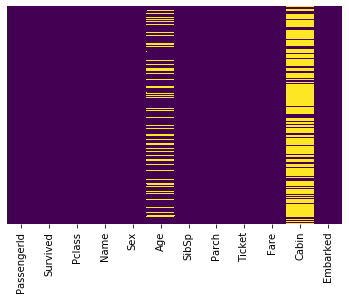

In [10]:

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# count of how much survived or how much not

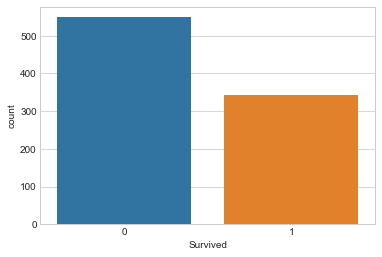

In [11]:


sns.countplot(x='Survived',data=train)

# count of how much survived or how much not with respect to Gender(sex)

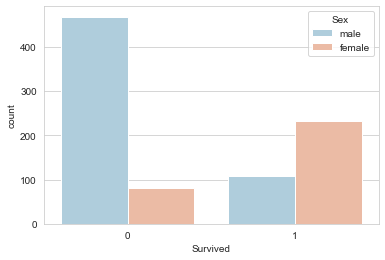

In [12]:

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

# count of how much survived or how much not with repect to passenger class

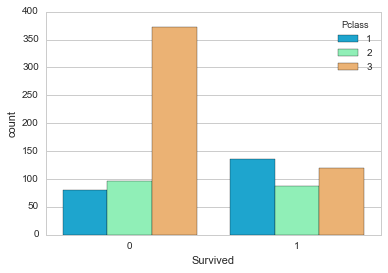

In [79]:

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

# Part-2 EDA

In [ ]:
to find distribution of age,to find age range of people that are on ship
to find distribution of age who gets survived
to find distribution of age who does not get survived
Plot histogram of age
Perform countplot on Sibsp
Plot histogram of Fare

# to find distribution of age,to find age range of people that are on ship

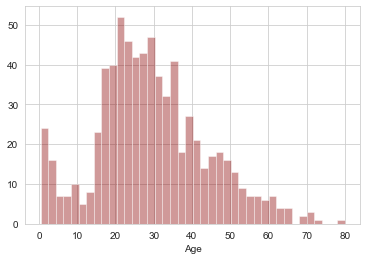

In [17]:

#kde-kernel density estimation,used to see prob.density function
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

# to find distribution of age who gets survived

In [7]:
alive=train[train['Survived']==1]

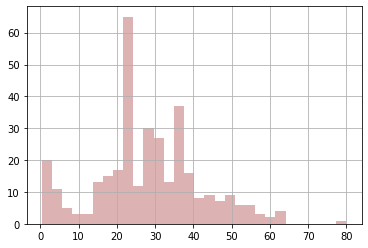

In [8]:
alive['Age'].hist(bins=30,color='darkred',alpha=0.3)

# to find distribution of age who doesn't survived

In [10]:
die=train[train['Survived']==0]

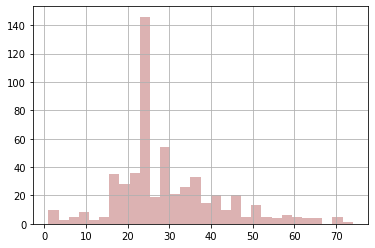

In [11]:
die['Age'].hist(bins=30,color='darkred',alpha=0.3)

# Plot histogram of age

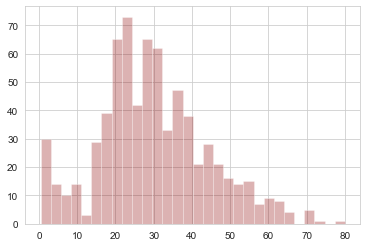

In [18]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

# Perform countplot on Sibsp

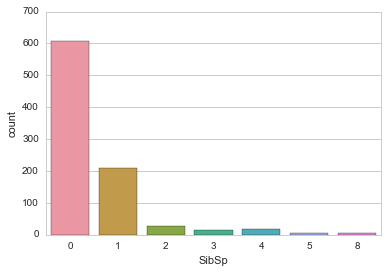

In [82]:
sns.countplot(x='SibSp',data=train)

# Plot histogram of Fare

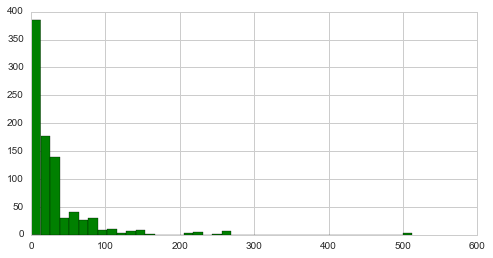

In [83]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

# Part-3 EDA

In [ ]:
plot distribution of those persons fare who are alive
plot distribution of those persons fare who are not survived
plot distribution of Fare of those persons where Pclass is 1
plot distribution of Fare of those persons where Pclass is 3
plot Distribution of fare gender-wise

#Some Data Cleaning question
With respect to passenger class,what is avg age of people?

# plot distribution of those persons fare who are alive

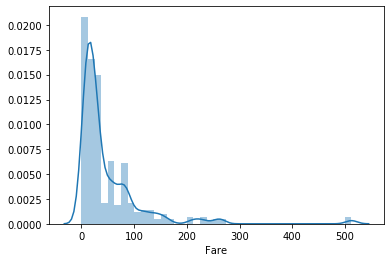

In [14]:
sns.distplot(alive['Fare'])

# plot distribution of those persons fare who are not survived

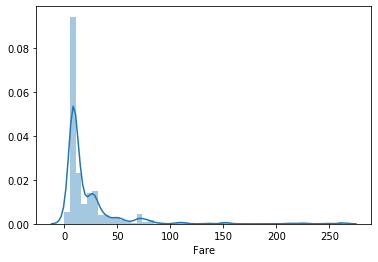

In [15]:
sns.distplot(die['Fare'])

# plot distribution of Fare of those persons where Pclass is 1

In [16]:
pclass1=train[train['Pclass']==1]

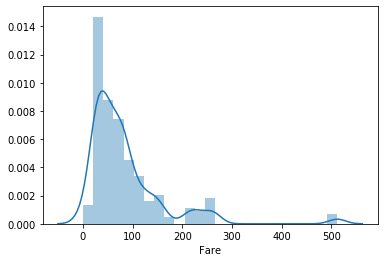

In [17]:
sns.distplot(pclass1['Fare'])

# plot distribution of Fare of those persons where Pclass is 3

In [18]:
pclass3=train[train['Pclass']==3]

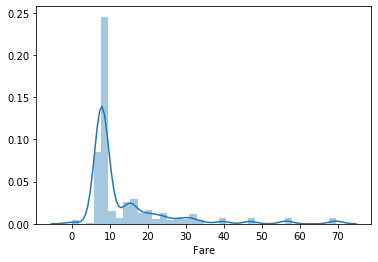

In [19]:
sns.distplot(pclass3['Fare'])

# plot Distribution of fare gender-wise

In [20]:
male=train[train['Sex']=='male']

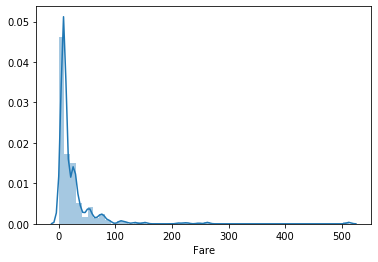

In [21]:
sns.distplot(male['Fare'])

# In case of female

In [22]:
female=train[train['Sex']=='female']

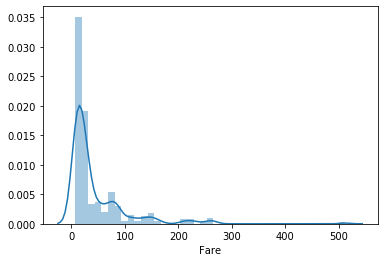

In [23]:
sns.distplot(female['Fare'])

___
## Data Cleaning


# With respect to passenger class,what is avg age of people?

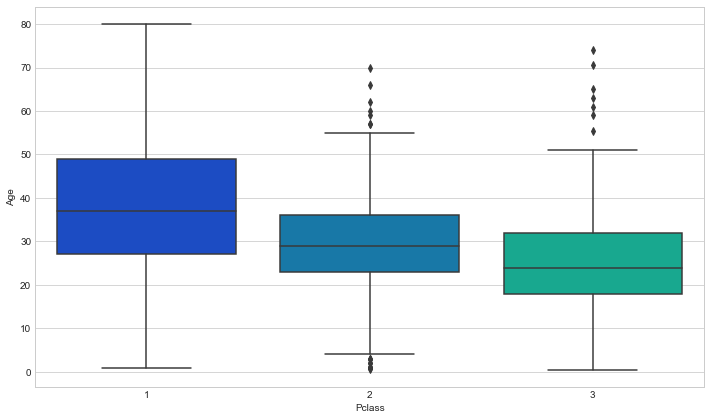

In [26]:


plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')
#we can visualise in box plot that,for class 1,avg value is somewhere around 40,for pclass 2,it is around 30, 
#for pclass 3, it is 25 

# We want to fill in missing age data instead of just dropping the missing age data rows


We'll use these average age values to impute based on Pclass for Age.

In [4]:
#create a func where we r giving age and passenger_class col
def impute_age(cols):
    #first col is age,2nd col is basicallly pclass
    Age = cols[0]
    Pclass = cols[1]
    
    
    #ie if there is a null value in a col
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24
        
#when not null we basically return age value 
    else:
        return Age

In [7]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [5]:
#apply func
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

In [25]:
train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 24.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 29.  , 31.  , 34.  , 15.  ,
       28.  ,  8.  , 19.  , 40.  , 37.  , 66.  , 42.  , 21.  , 18.  ,
        3.  ,  7.  , 49.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  ,
       32.  , 16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 46.  , 59.  ,
       71.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

Now let's check that heat map again!

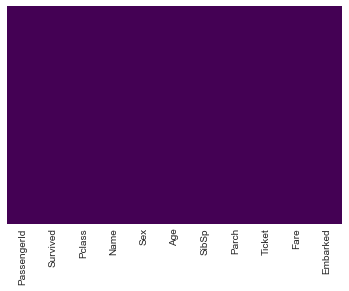

In [33]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')